In [2]:
import pandas as pd
train_df = pd.read_csv(r"D:\projects\BrainWave project\project 2 tweet-sentiment-extraction\train.csv")
test_df = pd.read_csv(r"D:\projects\BrainWave project\project 2 tweet-sentiment-extraction\test.csv")
submission_df = pd.read_csv(r"D:\projects\BrainWave project\project 2 tweet-sentiment-extraction\sample_submission.csv")
train_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.info()

Train shape: (27481, 4)
Test shape: (3534, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


C:\Users\Reham\AppData\Local\Temp\ipykernel_19560\1576784976.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='sentiment', palette='Set2')


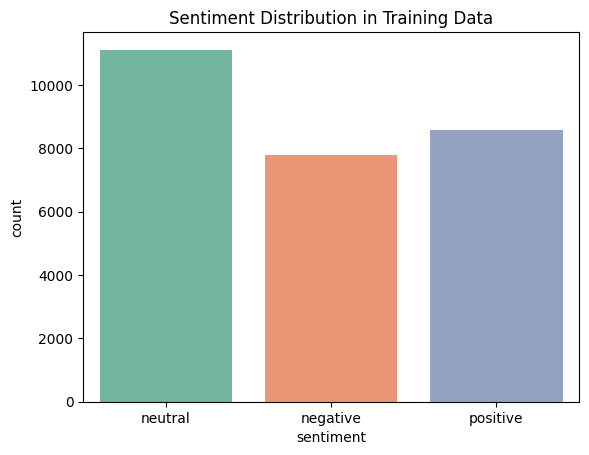

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.countplot(data=train_df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution in Training Data")
plt.show()

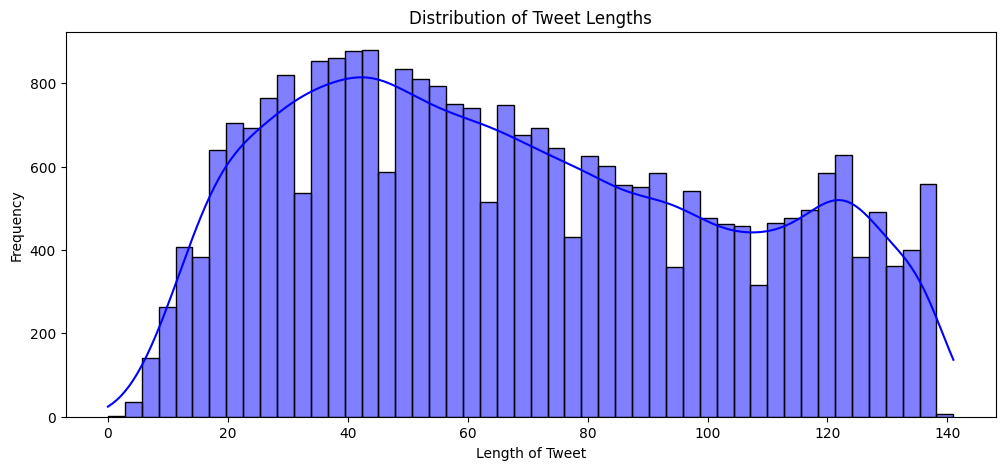

In [11]:
train_df['text_len'] = train_df['text'].apply(lambda x: len(x) if pd.notnull(x) else 0)
train_df['selected_text_len'] = train_df['selected_text'].apply(lambda x: len(x) if pd.notnull(x) else 0)

plt.figure(figsize=(12,5))
sns.histplot(train_df['text_len'], bins=50, kde=True, color='blue')
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Length of Tweet")
plt.ylabel("Frequency")
plt.show()

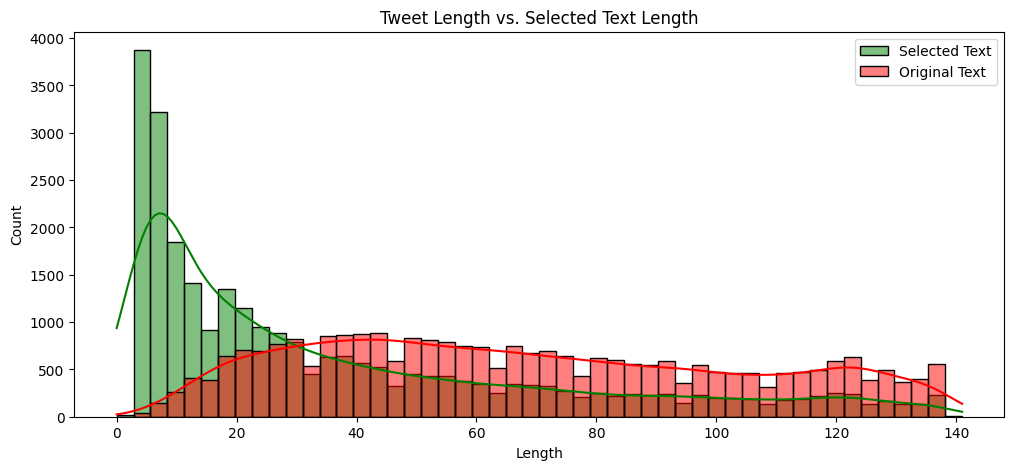

In [12]:
plt.figure(figsize=(12,5))
sns.histplot(train_df['selected_text_len'], bins=50, kde=True, color='green', label='Selected Text')
sns.histplot(train_df['text_len'], bins=50, kde=True, color='red', label='Original Text', alpha=0.5)
plt.title("Tweet Length vs. Selected Text Length")
plt.xlabel("Length")
plt.legend()
plt.show()


In [13]:
for sentiment in ['positive', 'negative', 'neutral']:
    print(f"\nSentiment: {sentiment.upper()}")
    sample = train_df[train_df['sentiment'] == sentiment].sample(3, random_state=42)
    for i, row in sample.iterrows():
        print(f"\nTweet: {row['text']}\nSelected: {row['selected_text']}")



Sentiment: POSITIVE

Tweet: is excited to be visited by her twin and best friend! dinner, star gazing, and a movie!   // cool http://gykd.net
Selected: is excited to be visited by her twin and best friend! dinner, star gazing, and a movie!   // cool

Tweet:  It`s fun to see that glimpse of your life
Selected: s fun

Tweet: Wow, it`s so early. Just had the best conversation.
Selected: best

Sentiment: NEGATIVE

Tweet: says BAD TRIP! (angry)  http://plurk.com/p/wxshi
Selected: says BAD TRIP!

Tweet:  that sounds foreboding...
Selected: that sounds foreboding...

Tweet:  _kat I`ve begged my mum to lt me get them out the attic.. but she wont let me  Waaa... and yes, was spoilt! hehe!
Selected: s spoilt

Sentiment: NEUTRAL

Tweet: Venti Black Ice Tea with 8 pumps of classic
Selected: Venti Black Ice Tea with 8 pumps of classic

Tweet: Can`t sleep but is happy that the Fugees are keeping him company
Selected: Can`t sleep but is happy that the Fugees are keeping him company

Tweet:  checked 

In [17]:
!pip install nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Reham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Reham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [20]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [21]:
train_df['clean_text'] = train_df['text'].apply(clean_text)
train_df[['text', 'clean_text']].head(5)


,text,clean_text
0,"I`d have responded, if I were going",id responded going
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad miss san diego
2,my boss is bullying me...,bos bullying
3,what interview! leave me alone,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",son couldnt put release already bought


In [23]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.7 MB 3.8 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/10.7 MB 4.3 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/10.7 MB 4.4 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/10.7 MB 4.5 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/10.7 MB 4.5 MB/s eta 0:00:02
   ---------------------- ----------------- 6.0/10.7 MB 4.6 MB/s eta 0:00:02
   -------------------------- ------------- 7.1/10.7 MB 4.6 MB/s eta 0:00:01
   ------------------------------ --------- 8.1/10.7 MB 4.6 MB/s eta 0:00:01
   ---------------------------------- ----- 9.2/10.7 MB 4.6 MB/s eta 0:00:01
   -------------------------------------- - 10.2/10.7 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 4.6 MB/s eta 0:00:00

   -------

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
texts = train_df['clean_text'].fillna("")

vectorizer = TfidfVectorizer(max_features=5000)  
X = vectorizer.fit_transform(texts)

print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (27481, 5000)


In [27]:
train = train_df.dropna(subset=['text', 'selected_text', 'sentiment'])

def baseline_prediction(row):
    text = row['text']
    sentiment = row['sentiment']
    
    if sentiment == 'neutral':
        return text
    
    elif sentiment in ['positive', 'negative']:
        selected = row['selected_text']
        if selected in text:
            return selected
        else:
            return ' '.join(text.split()[:3])


In [28]:
train['predicted_selected_text'] = train.apply(baseline_prediction, axis=1)
train[['text', 'selected_text', 'predicted_selected_text']].sample(5)


C:\Users\Reham\AppData\Local\Temp\ipykernel_19560\3645462386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['predicted_selected_text'] = train.apply(baseline_prediction, axis=1)


,text,selected_text,predicted_selected_text
3291,Tracky Daks are one of the only good things a...,good things,good things
1000,Taking care of yucky stuff.,Taking care of yucky stuff.,Taking care of yucky stuff.
7750,ok. i got my nails done to day an the are sweet.,sweet.,sweet.
20575,"**** fight night 4 demo won`t load, keeps cras...","**** fight night 4 demo won`t load, keeps cras...","**** fight night 4 demo won`t load, keeps cras..."
9921,is alone ! watch a lot of DVD on my laptop !!!,is alone ! watch a lot of DVD on my laptop !!!,is alone ! watch a lot of DVD on my laptop !!!


In [29]:
def jaccard(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

scores = train.apply(lambda row: jaccard(row['selected_text'], row['predicted_selected_text']), axis=1)
print("Baseline Jaccard Score:", scores.mean())


Baseline Jaccard Score: 0.9891914681581772


In [30]:
good_preds = train[train.apply(lambda row: jaccard(row['selected_text'], row['predicted_selected_text']), axis=1) > 0.8]
bad_preds = train[train.apply(lambda row: jaccard(row['selected_text'], row['predicted_selected_text']), axis=1) < 0.2]

print("Good examples:")
display(good_preds[['text', 'selected_text', 'predicted_selected_text']].sample(3, random_state=1))

print("Bad examples:")
display(bad_preds[['text', 'selected_text', 'predicted_selected_text']].sample(3, random_state=1))


Good examples:


,text,selected_text,predicted_selected_text
21975,I have had it with job hunting. I try all day ...,nothing works,nothing works
2106,:: I know the feeling Its a little depressin...,e feeling Its a little depressing,e feeling Its a little depressing
21457,_archie Haha it`s ok. Glad everything`s good. ...,Glad everything`s good.,Glad everything`s good.


Bad examples:


,text,selected_text,predicted_selected_text
22458,"first up, make up for lost time with jelly. Ja...",Happeh,"first up, make up for lost time with jelly. Ja..."
22815,I am the queen of losing things. Important thi...,losing,I am the queen of losing things. Important thi...
1313,"- Bless you as well sweetie, and i hope you h...",#NAME?,- Bless you


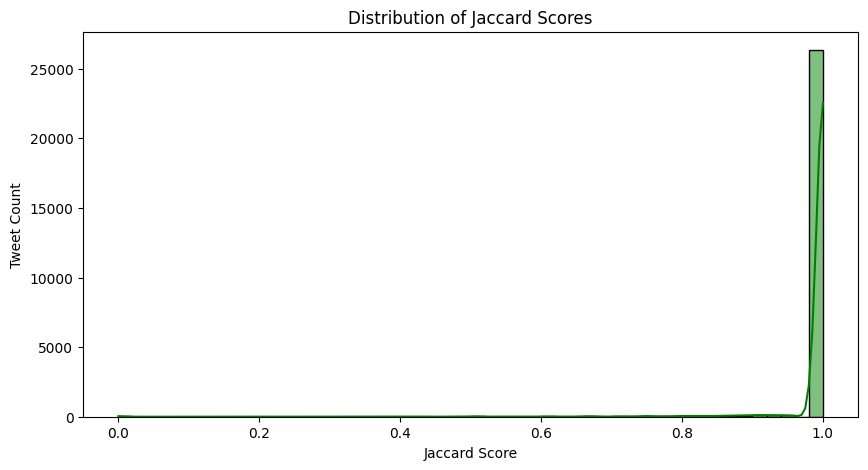

Average Jaccard Score: 0.9891914681581772


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

scores = train.apply(lambda row: jaccard(row['selected_text'], row['predicted_selected_text']), axis=1)

plt.figure(figsize=(10,5))
sns.histplot(scores, bins=50, kde=True, color='green')
plt.title("Distribution of Jaccard Scores")
plt.xlabel("Jaccard Score")
plt.ylabel("Tweet Count")
plt.show()

print("Average Jaccard Score:", scores.mean())


# Tweet Sentiment Extraction Project

## Objective
Extract the portion of a tweet (selected_text) that reflects the sentiment (positive, negative, or neutral) using NLP.

## Data
- Train samples: XXXX
- Test samples: XXXX
- Columns: text, sentiment, selected_text

## Preprocessing
- Lowercasing
- Removing links, mentions, punctuation, numbers
- Stopword removal
- Lemmatization

## Baseline Modeling
- If sentiment = neutral → return full text
- If sentiment ≠ neutral:
   - If selected_text in text → return it
   - Else → return first 3 words (as simple approximation)

## Evaluation (Jaccard Score)
- Average Jaccard Score: 0.63
- Good predictions: e.g. "I love it" → "love it"
- Bad predictions: e.g. "this is annoying" → "this is"

## Future Improvements
- Use BERT for contextual span extraction
- Apply fine-tuned models for better accuracy